# K-means clustering algorithm to group customers of a retail based on their purchase history

Understanding Data :

In [69]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score 

In [70]:
# This should print True if the file exists
import os
file_path = r'D:/Private/Prodigy InfoTech/Task 2/Mall_Customers.csv'
print(os.path.exists(file_path))  

True


In [71]:
# reading data into the dataframe
data = pd.read_csv(r'D:/Private/Prodigy InfoTech/Task 2/Mall_Customers.csv')
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [72]:
# displaying first five rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
# replace Male and Female with 0 and 1
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [74]:
# shape of the dataframe
data.shape

(200, 5)

In [75]:
# concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [ ]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [77]:
# column names
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [78]:
# checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Visualizations :

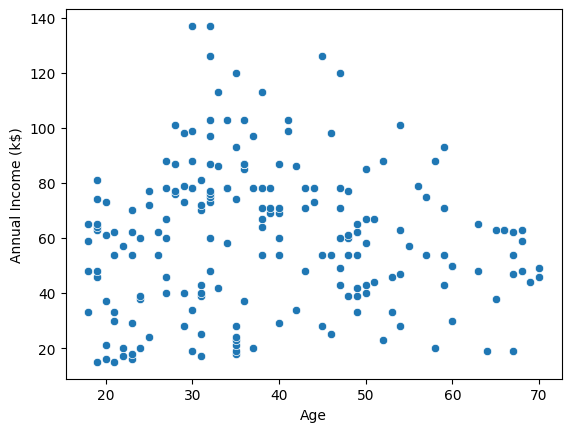

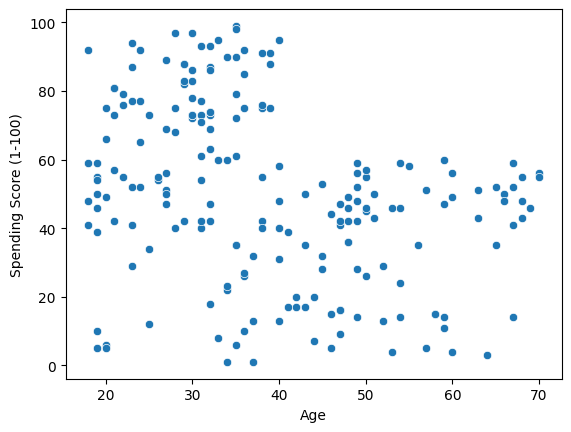

In [79]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data)
plt.show()

# plot the spending score
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data)
plt.show()

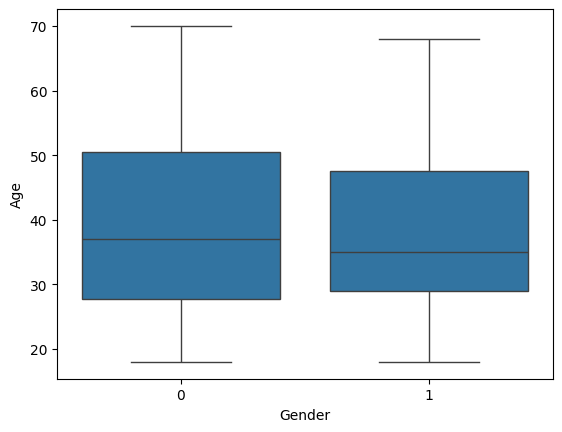

In [80]:
# box plot for the data
sns.boxplot(x='Gender', y='Age', data=data)
plt.show()

Classification Model :

In [81]:
# Selecting relevant features
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [82]:
features

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [83]:
# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [84]:
# Finding optimal clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

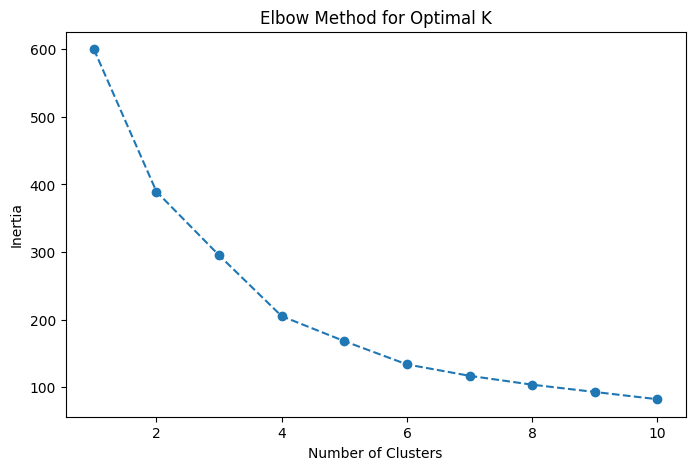

In [85]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

K-Means Clustering

In [ ]:
# Applying K-Means clustering with optimal K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

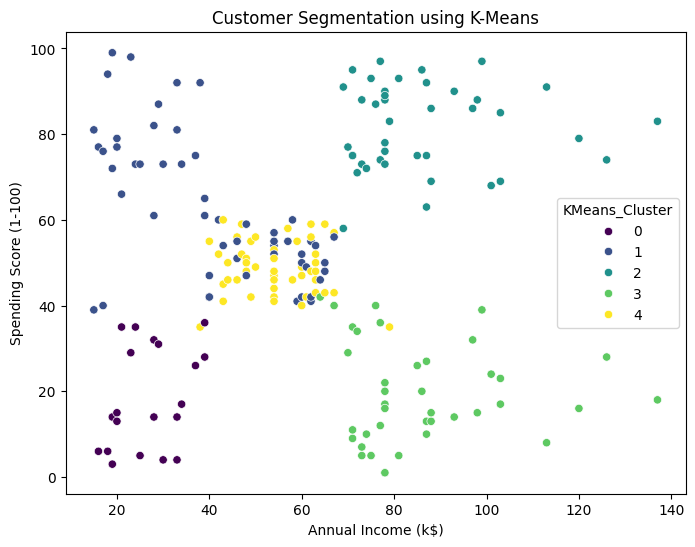

In [87]:
# Visualizing K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['KMeans_Cluster'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.show()

Sample prediction

In [88]:
sample_input = pd.DataFrame([[0, 66, 50]], columns=['Gender', 'Age', 'Annual Income (k$)'])
predicted_score = kmeans.predict(sample_input)
print("KMeans Cluster Area:", predicted_score[0])

KMeans Cluster Area: 2


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [89]:
sample_input = pd.DataFrame([[1, 10, 0]], columns=['Gender', 'Age', 'Annual Income (k$)'])
predicted_score = kmeans.predict(sample_input)
print("KMeans Cluster Area:", predicted_score[0])

KMeans Cluster Area: 3


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [90]:
sample_input = pd.DataFrame([[0, 0, 0]], columns=['Gender', 'Age', 'Annual Income (k$)'])
predicted_score = kmeans.predict(sample_input)
print("KMeans Cluster Area:", predicted_score[0])

KMeans Cluster Area: 4


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
